<a href="https://colab.research.google.com/github/Abhipshacodes/BURNOUT--A-MotoGP-Datathon/blob/main/motogp_dataset_testing_and_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
val_df = pd.read_csv("val.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("Val shape:", val_df.shape)


Train shape: (1914056, 45)
Test shape: (546874, 44)
Val shape: (273437, 45)


In [ ]:
# Inspect training data
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914056 entries, 0 to 1914055
Data columns (total 45 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Unique ID                        int64  
 1   Rider_ID                         int64  
 2   category_x                       object 
 3   Circuit_Length_km                float64
 4   Laps                             int64  
 5   Grid_Position                    int64  
 6   Avg_Speed_kmh                    float64
 7   Track_Condition                  object 
 8   Humidity_%                       int64  
 9   Tire_Compound_Front              object 
 10  Tire_Compound_Rear               object 
 11  Penalty                          object 
 12  Championship_Points              int64  
 13  Championship_Position            int64  
 14  Session                          object 
 15  year_x                           int64  
 16  sequence                         int64  
 17  rider   

In [ ]:
missing_train = train_df.isnull().sum().sort_values(ascending=False)
print("Missing values in training set:\n", missing_train[missing_train > 0])


missing_test = test_df.isnull().sum().sort_values(ascending=False)
print("\nMissing values in test set:\n", missing_test[missing_test > 0])

missing_val = val_df.isnull().sum().sort_values(ascending=False)
print("\nMissing values in validation set:\n", missing_val[missing_val > 0])


Missing values in training set:
 Penalty    321292
dtype: int64

Missing values in test set:
 Penalty    91555
dtype: int64

Missing values in validation set:
 Penalty    45620
dtype: int64


In [ ]:
print(train_df.columns)
categorical_cols = ['Tire_Compound_Front', 'Tire_Compound_Rear', 'Track_Condition', 'Weather',
                    'Bike_name', 'Team_name', 'Rider_name', 'Session']

for col in categorical_cols:
    if col in train_df.columns:
        print(f"{col} → Unique values: {train_df[col].nunique()}")
    else:
        print(f"Error: Column '{col}' not found in train_df")

Index(['Unique ID', 'Rider_ID', 'category_x', 'Circuit_Length_km', 'Laps',
       'Grid_Position', 'Avg_Speed_kmh', 'Track_Condition', 'Humidity_%',
       'Tire_Compound_Front', 'Tire_Compound_Rear', 'Penalty',
       'Championship_Points', 'Championship_Position', 'Session', 'year_x',
       'sequence', 'rider', 'team', 'bike', 'position', 'points', 'shortname',
       'circuit_name', 'rider_name', 'team_name', 'bike_name',
       'Lap_Time_Seconds', 'Corners_per_Lap',
       'Tire_Degradation_Factor_per_Lap', 'Pit_Stop_Duration_Seconds',
       'Ambient_Temperature_Celsius', 'Track_Temperature_Celsius', 'weather',
       'track', 'air', 'ground', 'starts', 'finishes', 'with_points',
       'podiums', 'wins', 'min_year', 'max_year', 'years_active'],
      dtype='object')
Tire_Compound_Front → Unique values: 3
Tire_Compound_Rear → Unique values: 3
Track_Condition → Unique values: 2
Error: Column 'Weather' not found in train_df
Error: Column 'Bike_name' not found in train_df
Error: Col

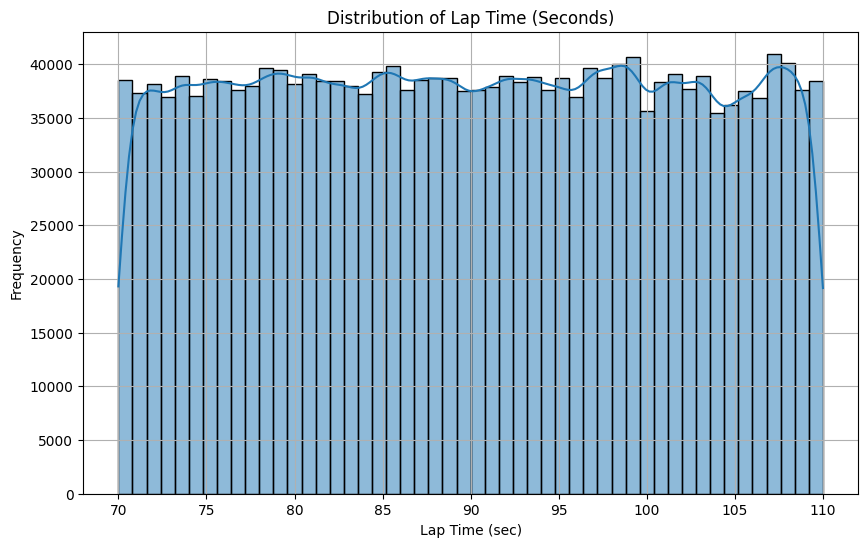

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(train_df['Lap_Time_Seconds'], bins=50, kde=True)
plt.title('Distribution of Lap Time (Seconds)')
plt.xlabel('Lap Time (sec)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
numeric_cols = ['Lap_Time_Seconds', 'Avg_Speed_kmh', 'Pit_Stop_Duration_Seconds',
                'Ambient_Temperature_Celsius', 'Track_Temperature_Celsius', 'Grid_Position']

train_df[numeric_cols].describe()


,Lap_Time_Seconds,Avg_Speed_kmh,Pit_Stop_Duration_Seconds,Ambient_Temperature_Celsius,Track_Temperature_Celsius,Grid_Position
count,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06,1.914056e+06
mean,9.000211e+01,2.496328e+02,3.501716e+00,2.498259e+01,3.249059e+01,1.149819e+01
std,1.153121e+01,5.773525e+01,8.681806e-01,5.761291e+00,7.215789e+00,6.334418e+00
min,7.000100e+01,1.500000e+02,2.000000e+00,1.500000e+01,1.510000e+01,1.000000e+00
25%,8.001300e+01,1.993500e+02,2.750000e+00,2.000000e+01,2.720000e+01,6.000000e+00
50%,8.998100e+01,2.496500e+02,3.500000e+00,2.490000e+01,3.240000e+01,1.200000e+01
75%,9.991700e+01,2.994600e+02,4.250000e+00,3.000000e+01,3.770000e+01,1.700000e+01
max,1.099990e+02,3.500000e+02,5.000000e+00,3.500000e+01,5.000000e+01,2.200000e+01


In [ ]:
# Filling categorical columns with 'Unknown'
cat_cols = ['Tire_Compound_Front', 'Tire_Compound_Rear', 'Track_Condition', 'Weather',
            'Bike_name', 'Team_name', 'Rider_name', 'Session']

for col in cat_cols:
    if col in train_df.columns:
        train_df[col] = train_df[col].fillna('Unknown')
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna('Unknown')
    if col in val_df.columns:
        val_df[col] = val_df[col].fillna('Unknown')

num_cols = ['Grid_Position', 'Avg_Speed_kmh', 'Humidity_%',
            'Pit_Stop_Duration_Seconds', 'Ambient_Temperature_Celsius',
            'Track_Temperature_Celsius', 'Track', 'Air', 'Ground']

for col in num_cols:
    median_val = None
    if col in train_df.columns:
        if pd.api.types.is_numeric_dtype(train_df[col]):
            median_val = train_df[col].median()
        else:
            print(f"Warning: Column '{col}' is not numeric. Skipping median calculation and fillna.")
            continue

    if col in train_df.columns and median_val is not None:
        train_df[col] = train_df[col].fillna(median_val)
    if col in test_df.columns and median_val is not None:
        test_df[col] = test_df[col].fillna(median_val)
    if col in val_df.columns and median_val is not None:
        val_df[col] = val_df[col].fillna(median_val)

penalty_col = 'Penalty'
if penalty_col in train_df.columns:

    penalty_mode = train_df[penalty_col].mode()[0]
    train_df[penalty_col] = train_df[penalty_col].fillna(penalty_mode)
    print(f"Filled missing '{penalty_col}' in train_df with mode: {penalty_mode}")
if penalty_col in test_df.columns:
    test_df[penalty_col] = test_df[penalty_col].fillna(penalty_mode)
    print(f"Filled missing '{penalty_col}' in test_df with mode: {penalty_mode}")
if penalty_col in val_df.columns:
    val_df[penalty_col] = val_df[penalty_col].fillna(penalty_mode)
    print(f"Filled missing '{penalty_col}' in val_df with mode: {penalty_mode}")

Filled missing 'Penalty' in train_df with mode: DNS
Filled missing 'Penalty' in test_df with mode: DNS
Filled missing 'Penalty' in val_df with mode: DNS


In [ ]:
drop_cols = ['Unique ID', 'Year_x', 'Rider', 'Team', 'Bike', 'Shortname', 'Track']

train_df = train_df.drop(columns=drop_cols, errors='ignore')
test_df = test_df.drop(columns=drop_cols, errors='ignore')
val_df = val_df.drop(columns=drop_cols, errors='ignore')


In [ ]:
from sklearn.preprocessing import LabelEncoder

encode_cols = ['Tire_Compound_Front', 'Tire_Compound_Rear', 'Track_Condition',
               'Weather', 'Bike_name', 'Team_name', 'Rider_name', 'Session', 'Circuit_name']

le_dict = {}

for col in encode_cols:

    if col in train_df.columns and col in test_df.columns and col in val_df.columns:
        le = LabelEncoder()

        train_df[col] = le.fit_transform(train_df[col].astype(str))
        test_df[col] = le.transform(test_df[col].astype(str))
        val_df[col] = le.transform(val_df[col].astype(str))
        le_dict[col] = le
    else:
        print(f"Warning: Column '{col}' not found in all dataframes. Skipping label encoding for this column.")

In [ ]:
drop_cols = ['Unique ID', 'Year_x', 'Rider', 'Team', 'Bike', 'Shortname', 'Track']
train_df = train_df.drop(columns=drop_cols, errors='ignore')

In [ ]:
required_cols = ['Ambient_Temperature_Celsius', 'Track_Temperature_Celsius', 'Ground']

def create_avg_temp(df, name):
    missing = [col for col in required_cols if col not in df.columns]
    if missing:
        print(f"Warning: Cannot create 'Avg_Temp' for {name}_df. Missing columns: {missing}")

        return df
    else:
        for col in required_cols:
             if not pd.api.types.is_numeric_dtype(df[col]):
                 print(f"Warning: Column '{col}' in {name}_df is not numeric. Skipping 'Avg_Temp' calculation.")
                 return df

        df['Avg_Temp'] = (df['Ambient_Temperature_Celsius'] +
                          df['Track_Temperature_Celsius'] + df['Ground']) / 3
        return df

train_df = create_avg_temp(train_df, 'train')
test_df = create_avg_temp(test_df, 'test')
val_df = create_avg_temp(val_df, 'val')

In [ ]:
required_cols = ['Ambient_Temperature_Celsius', 'Track_Temperature_Celsius']

for df, name in zip([train_df, test_df, val_df], ['train_df', 'test_df', 'val_df']):
    if all(col in df.columns for col in required_cols):
        df['Avg_Temp'] = df[['Ambient_Temperature_Celsius', 'Track_Temperature_Celsius']].mean(axis=1)
    else:
        print(f"Warning: Cannot create 'Avg_Temp' for {name}. Missing columns: {[col for col in required_cols if col not in df.columns]}")


In [ ]:
print("Train shape after cleaning:", train_df.shape)
print("Test shape after cleaning:", test_df.shape)
print("Validation shape after cleaning:", val_df.shape)

train_df.head()


Train shape after cleaning: (1914056, 45)
Test shape after cleaning: (546874, 44)
Validation shape after cleaning: (273437, 45)


,Rider_ID,category_x,Circuit_Length_km,Laps,Grid_Position,Avg_Speed_kmh,Track_Condition,Humidity_%,Tire_Compound_Front,Tire_Compound_Rear,...,ground,starts,finishes,with_points,podiums,wins,min_year,max_year,years_active,Avg_Temp
0,2659,Moto2,4.874,22,17,264.66,1,61,0,0,...,35,53,45,41,4,0,2018,2021,4,25.15
1,5205,Moto2,3.875,24,7,177.56,1,77,2,1,...,12,27,27,22,2,1,1975,1983,8,38.05
2,7392,Moto3,5.647,25,5,317.74,0,87,2,0,...,23,45,43,10,0,0,1982,1989,8,23.85
3,7894,Moto3,4.810,19,3,321.82,1,43,2,0,...,35,192,172,155,16,9,1994,2009,16,25.00
4,6163,MotoGP,5.809,25,21,239.92,1,47,0,1,...,31,175,146,132,29,17,2011,2021,11,36.25


In [ ]:
X = train_df.drop(columns=['Lap_Time_Seconds'])  # Features
y = train_df['Lap_Time_Seconds']                 # Target


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [ ]:
!pip install xgboost


In [ ]:
from sklearn.preprocessing import LabelEncoder

obj_cols = ['category_x', 'Penalty', 'Shortname', 'Circuit_name',
            'Rider_name', 'Team_name', 'Bike_name', 'Weather', 'Track']

for col in obj_cols:
    if col in train_df.columns:
        le = LabelEncoder()
        combined_data = pd.concat([train_df[col], test_df[col], val_df[col]], axis=0).astype(str)
        le.fit(combined_data)

        train_df[col] = le.transform(train_df[col].astype(str))
        test_df[col] = le.transform(test_df[col].astype(str))
        val_df[col] = le.transform(val_df[col].astype(str))


In [ ]:
X = train_df.drop(columns=['Lap_Time_Seconds'])
y = train_df['Lap_Time_Seconds']


In [ ]:
print(X_train.dtypes.value_counts())


int64      28
float64     8
object      7
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(X_train.dtypes.value_counts())

int64      28
float64     8
object      7
Name: count, dtype: int64


In [ ]:
X_train.select_dtypes(include='object').columns.tolist()


['shortname',
 'circuit_name',
 'rider_name',
 'team_name',
 'bike_name',
 'weather',
 'track']

In [ ]:
from sklearn.preprocessing import LabelEncoder

object_columns = ['shortname', 'circuit_name', 'rider_name', 'team_name',
                  'bike_name', 'weather', 'track']

for col in object_columns:
    if col in train_df.columns and col in test_df.columns and col in val_df.columns:
        le = LabelEncoder()
        combined_data = pd.concat([
            train_df[col].astype(str),
            test_df[col].astype(str),
            val_df[col].astype(str)
        ])
        le.fit(combined_data)

        train_df[col] = le.transform(train_df[col].astype(str))
        test_df[col] = le.transform(test_df[col].astype(str))
        val_df[col] = le.transform(val_df[col].astype(str))
    else:
        print(f"⚠️ Skipping '{col}' — not found in all DataFrames.")


In [ ]:
X = train_df.drop(columns=['Lap_Time_Seconds'])
y = train_df['Lap_Time_Seconds']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print("✅ Data types in X_train now:")
print(X_train.dtypes.value_counts())


✅ Data types in X_train now:
int64      36
float64     8
Name: count, dtype: int64


IMPROVING FROM THE BASELINE SCORE

In [ ]:
def add_features(df):

    df['Total_Tire_Degradation'] = df['Tire_Degradation_Factor_per_Lap'] * df['Laps']

    # Estimated Total Pit Stop Impact
    df['Pit_Stop_Impact'] = df['Pit_Stop_Duration_Seconds'] / (df['Laps'] + 1)

    # Adjusted speed per km
    df['Speed_per_km'] = df['Avg_Speed_kmh'] / (df['Circuit_Length_km'] + 1e-5)

    # Combined temp feature
    if all(col in df.columns for col in ['Ambient_Temperature_Celsius', 'Track_Temperature_Celsius']):
        df['Avg_Temp'] = (df['Ambient_Temperature_Celsius'] + df['Track_Temperature_Celsius']) / 2

    # Tire compound interaction
    df['Tire_Strategy'] = df['Tire_Compound_Front'].astype(str) + "_" + df['Tire_Compound_Rear'].astype(str)

    return df

train_df = add_features(train_df)
test_df = add_features(test_df)
val_df = add_features(val_df)


In [ ]:

dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dval = xgb.DMatrix(X_val, label=y_val, enable_categorical=True)

params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.03,
    'max_depth': 9,
    'subsample': 0.9,
    'colsample_bytree': 0.9,
    'reg_alpha': 2,
    'reg_lambda': 5,
    'min_child_weight': 5,
    'seed': 42,
    'eval_metric': 'mae'
}

evallist = [(dval, 'eval'), (dtrain, 'train')]


model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=evallist,
    early_stopping_rounds=30,
    verbose_eval=True
)

val_preds = model.predict(dval)
mae = mean_absolute_error(y_val, val_preds)
print(f"✅ Validation MAE: {mae:.4f}")

[0]	eval-mae:9.98599	train-mae:9.97487
[1]	eval-mae:9.97900	train-mae:9.96780
[2]	eval-mae:9.97001	train-mae:9.95867
[3]	eval-mae:9.96314	train-mae:9.95170
[4]	eval-mae:9.95688	train-mae:9.94527
[5]	eval-mae:9.94955	train-mae:9.93784
[6]	eval-mae:9.94287	train-mae:9.93120
[7]	eval-mae:9.93605	train-mae:9.92430
[8]	eval-mae:9.92849	train-mae:9.91646
[9]	eval-mae:9.91911	train-mae:9.90701
[10]	eval-mae:9.91189	train-mae:9.89967
[11]	eval-mae:9.90479	train-mae:9.89252
[12]	eval-mae:9.89669	train-mae:9.88436
[13]	eval-mae:9.88956	train-mae:9.87709
[14]	eval-mae:9.88257	train-mae:9.86984
[15]	eval-mae:9.87768	train-mae:9.86490
[16]	eval-mae:9.87091	train-mae:9.85796
[17]	eval-mae:9.86251	train-mae:9.84935
[18]	eval-mae:9.85577	train-mae:9.84244
[19]	eval-mae:9.85184	train-mae:9.83849
[20]	eval-mae:9.84425	train-mae:9.83077
[21]	eval-mae:9.83559	train-mae:9.82178
[22]	eval-mae:9.82888	train-mae:9.81505
[23]	eval-mae:9.82394	train-mae:9.81002
[24]	eval-mae:9.81566	train-mae:9.80136
[25]	eval-

In [ ]:
cat_cols = test_df.select_dtypes(include='object').columns

for col in cat_cols:
    test_df[col] = test_df[col].astype('category')
test_df['Tire_Strategy'] = test_df['Tire_Strategy'].astype('category')


In [ ]:
dtest = xgb.DMatrix(test_df, enable_categorical=True)
test_preds = model.predict(dtest)


In [ ]:
df.to_csv('submission.csv', index=False)


In [ ]:
print(submission.head())
print(submission.columns)
print(len(submission), "rows")


   Unique ID  Lap_Time_Seconds
0     288307         89.929359
1     704288         92.441414
2     951491         89.606865
3    2591721         90.073486
4    1202653         90.855957
Index(['Unique ID', 'Lap_Time_Seconds'], dtype='object')
546874 rows


In [ ]:
sample = pd.read_csv('sample_submission.csv')
print(sample.columns)
print(len(sample), "expected rows")


Index(['Unique ID', 'Lap_Time_Seconds'], dtype='object')
546874 expected rows


In [ ]:
submission.to_csv('solution.csv', index=False)


In [ ]:
from google.colab import files
files.download('solution.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>